# Machine Learning Project - Revenue Prediction :
---
- ## Write a program to predict the revenue generated by each sale.

- ## Your task is also to predict whether the particular revenue was generated on the weekend or not using the same model. Additionally, you need to find out **Informational_Duration** using the ensemble learning algorithm.
---
# Importing all necessary modules :

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Loading the dataset into a pandas dataframe :

In [41]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/ML Projects/Datasets/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Checking the details of our dataframe :

In [42]:
data.shape

(12330, 18)

In [43]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [45]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Checking for null values :

In [46]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


<Axes: >

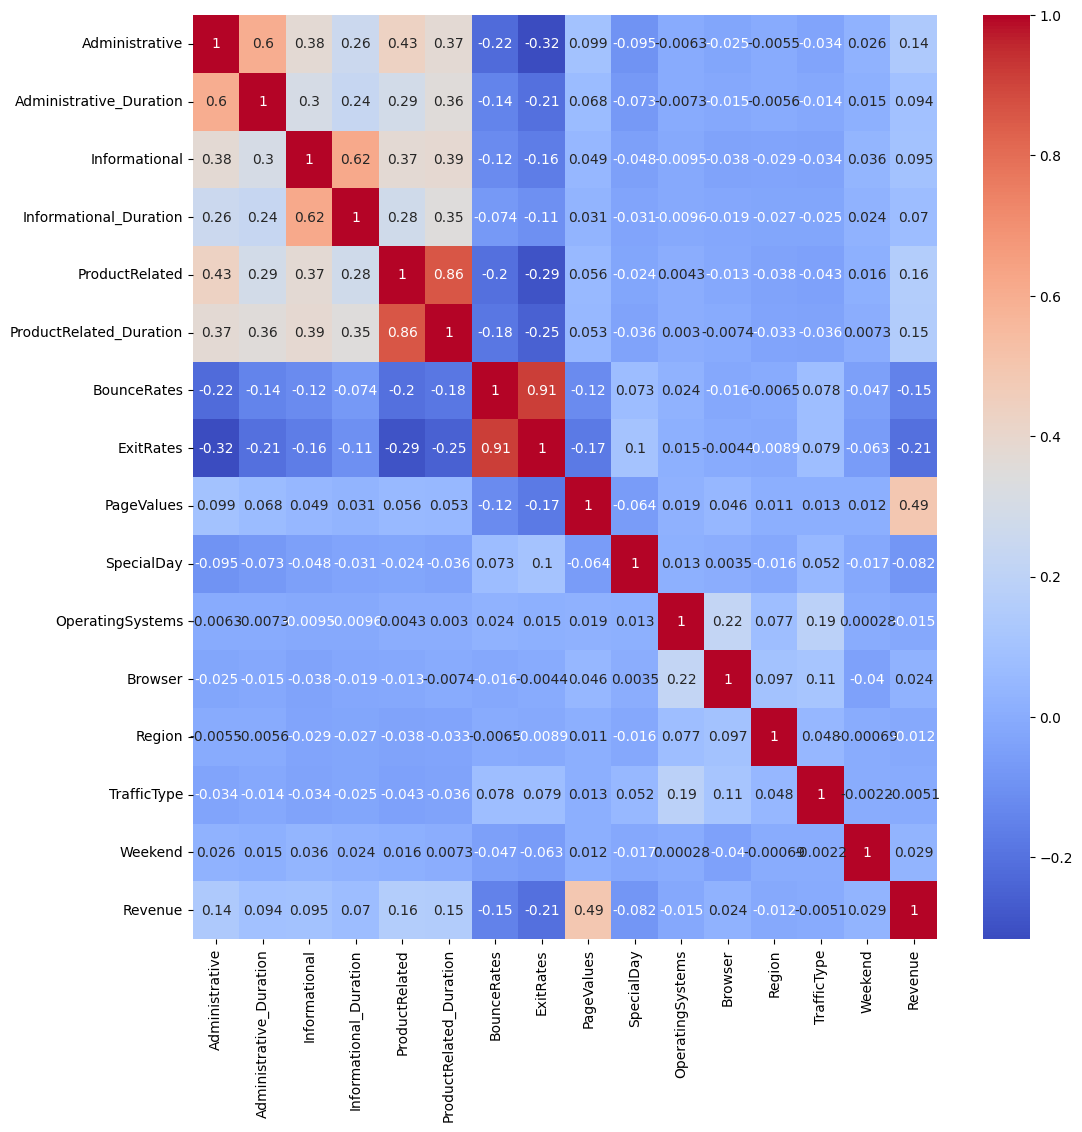

In [47]:
corr_matrix = data.corr(numeric_only = True)
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

## The heatmap visualizes the correlation matrix, making it easier to identify patterns:

- ### **Strongest positive correlation :** The strongest positive correlation is between ProductRelated and ProductRelated_Duration (0.86), shown by a dark red color. This suggests that users who visit more product-related pages tend to spend more time on them.
- ### **Strongest negative correlation :** The strongest negative correlation is between ExitRates and PageValues (-0.75), represented by a dark blue color. This indicates that pages with high exit rates tend to have lower values, possibly because users are not finding what they are looking for.
- ### **Administrative, Administrative Duration, Informational, Informational Duration :** These pairs have a moderate positive correlation, suggesting that users who spend more time on administrative pages also tend to spend more time on informational pages, and vice-versa.
- ### **Weekend :** There is no strong correlation between Weekend and other variables.
---
# Sorting the correlation of all columns with **'Revenue'** in ascending order :

In [48]:
corr_matrix['Revenue'].sort_values(ascending = True)

,Revenue
ExitRates,-0.207071
BounceRates,-0.150673
SpecialDay,-0.082305
OperatingSystems,-0.014668
Region,-0.011595
TrafficType,-0.005113
Browser,0.023984
Weekend,0.029295
Informational_Duration,0.070345
Administrative_Duration,0.093587


## So as we can see :
- ### **PageValues** has the highest **positive** **correlation** with **Revenue**, and **ExitRates** has the highest **negative** **correlation** with **Revenue**.
---
# Sorting the correlation of all columns with **'Weekend'** in ascending order :

In [49]:
corr_matrix['Weekend'].sort_values(ascending = True)

,Weekend
ExitRates,-0.062587
BounceRates,-0.046514
Browser,-0.040261
SpecialDay,-0.016767
TrafficType,-0.002221
Region,-0.000691
OperatingSystems,0.000284
ProductRelated_Duration,0.007311
PageValues,0.012002
Administrative_Duration,0.014990


### As we can see : Weekend has a negligible correlation with other features, especially Revenue.
---
# Encoding the categorical values in the **'VisitorType'** column into numerical values using **LabelEncoder** :

In [50]:
encoder = LabelEncoder()
data['VisitorType'] = encoder.fit_transform(data['VisitorType'])

In [51]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,2,True,False


# Encoding the categorical values in the **'Month'** column into numerical values using **LabelEncoder** :

In [52]:
data['Month'] = encoder.fit_transform(data['Month'])

# Separating features and target variable :

In [53]:
x = data.drop(['Revenue'], axis = 1)
y = data['Revenue']

# Balancing classes of target variable (y) using Over Sampling SMOTE :

In [54]:
y.value_counts()

,count
Revenue,
False,10422
True,1908


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

y_resampled.value_counts()

,count
Revenue,
False,10422
True,10422


# Splitting our data into training and testing set :

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 42)

# Standardizing the features :

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression :

In [58]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy : 0.8452866394818901


# Decision Tree :

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy : 0.8901415207483809


# Gaussian Naive Bayes :

In [60]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_gnb))

Accuracy : 0.741184936435596


# Random Forest Classifier :

In [61]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy : 0.9285200287838811


## So we can see the **Random Forest Classifier** is the best performing algorithm out of all.
---
## Below line calculates the **Receiver Operating Characteristic Area Under the Curve (ROC AUC)** score to evaluate the performance of the Random Forest Classifier.

In [62]:
roc_value = metrics.roc_auc_score(y_test, y_pred_rfc)

In [63]:
print("Area under the ROC curve is :", round(roc_value, 2))

Area under the ROC curve is : 0.93


### An AUC of 0.93 indicates that our model has excellent ability to predict whether a sale generated revenue.
---
## Calculating the false positive rate, true positive rate, and thresholds for different classification points to be used for plotting the ROC curve :

In [64]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rfc)

# Calculating the **area under the ROC curve** using the **false positive rate** and **true positive rate** :

In [65]:
auc = metrics.auc(fpr, tpr)

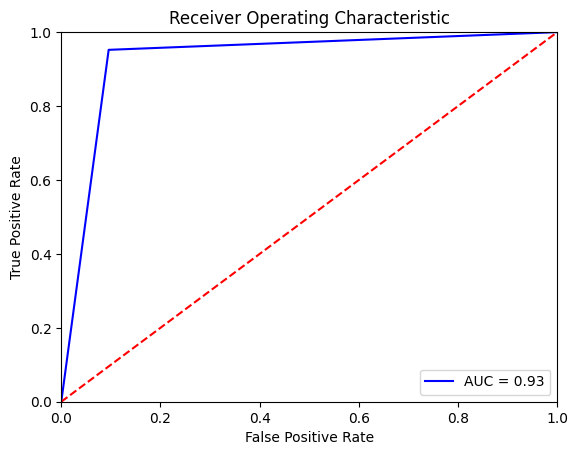

In [67]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2F' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## As we can see : the AUC is 0.93, which indicates that the classifier has excellent ability to distinguish between the two classes.

- ### The blue line in the graph represents the ROC curve for the classifier. The red dashed line represents the ROC curve for a random classifier.

- ### The closer the blue line is to the top-left corner of the graph, the better the classifier's performance.
---
- ## Let's see wheather our model can classify a particular user browsing on the weekend or not depending on every other  bit of data :

In [70]:
x = data.drop(['Weekend'], axis = 1)
y = data['Weekend']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Accuracy :", metrics.accuracy_score(y_test, y_pred_lr))

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
print("Decision Tree Classifier Accuracy :", metrics.accuracy_score(y_test, y_pred_dtc))

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print("Gaussian Naive Bayes Accuracy :", metrics.accuracy_score(y_test, y_pred_gnb))

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
print("Random Forest Classifier Accuracy :", metrics.accuracy_score(y_test, y_pred_rfc))

Logistic Regression Accuracy : 0.748580697485807
Decision Tree Classifier Accuracy : 0.6723438767234388
Gaussian Naive Bayes Accuracy : 0.7076236820762368
Random Forest Classifier Accuracy : 0.7643957826439578


## As we can see **Random Forest Classifier** is the best algorithm in this case.
- ### But for a classification algorithm the accuracy value is quite low as this is a binary classification (True/False) - the accuracy will be atleast 50 %.
- ### This may be because we don't have data correlated to the column **'Weekend'**.